# SVM Using Feature Selection (using Correlations )

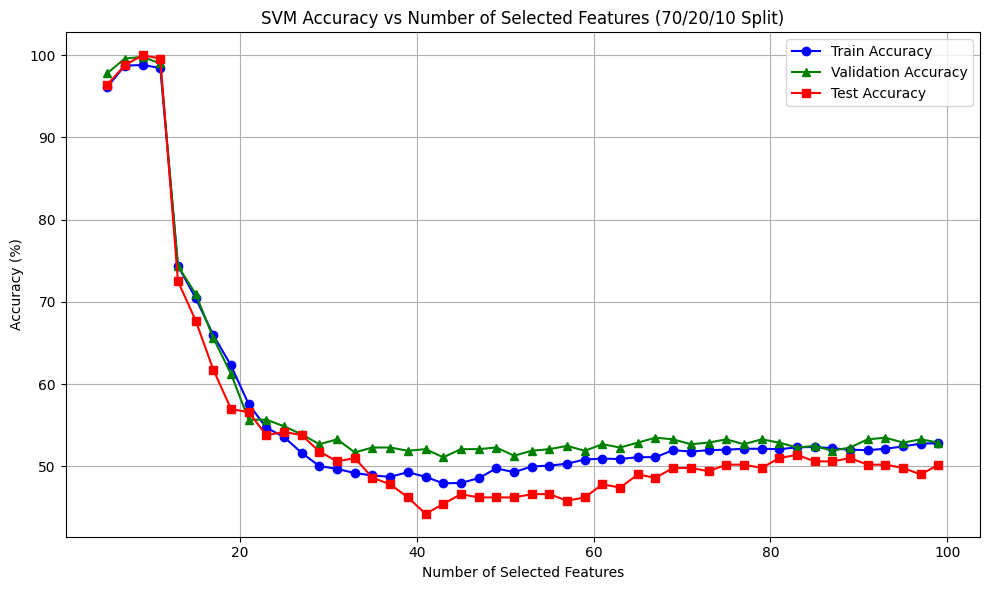

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

class SVM:
    def __init__(self, C=1.0, lr=0.01, tol=1e-3, max_iter=500):
        self.C = C          # Regularization parameter
        self.lr = lr        # Learning rate for gradient ascent
        self.tol = tol      # Convergence threshold
        self.max_iter = max_iter  # Max iterations
        self.alphas = None  # Lagrange multipliers
        self.w = None       # Weight vector
        self.b = None       # Bias term

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Applying Kernel Trick:
        # K = np.dot(X, X.T)  # Linear kernel: K(x_i, x_j) = x_i . x_j
        gamma = 0.1
        K = np.exp(-gamma * np.linalg.norm(X[:, None] - X, axis=2) ** 2) # RBF Kernel
        self.alphas = np.zeros(n_samples)  # Initialize Lagrange multipliers to 0

        for _ in range(self.max_iter):
            # Compute gradient
            gradient = np.ones(n_samples) - (self.alphas * y) @ K * y

            # Update alpha using gradient ascent
            self.alphas += self.lr * gradient

            # Apply constraints: 0 ≤ α ≤ C
            self.alphas = np.clip(self.alphas, 0, self.C)

            # Check KKT conditions for convergence
            if np.linalg.norm(gradient) < self.tol:
                break

        # Support vectors have α > 0
        sv = self.alphas > 1e-5
        self.sv_X = X[sv]
        self.sv_y = y[sv]
        self.alphas = self.alphas[sv]

        # Compute w (Weight vector)
        self.w = np.sum((self.alphas * self.sv_y)[:, None] * self.sv_X, axis=0)

        # Compute bias b using support vectors
        self.b = np.mean(self.sv_y - np.dot(self.sv_X, self.w))

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)


def feature_selection(X, y, num_features):
    """
    Selects the top 'num_features' based on correlation with the target variable.
    """
    correlations = np.array([np.corrcoef(X[:, i], y)[0, 1] for i in range(X.shape[1])])
    correlations = np.nan_to_num(correlations)  # Handle NaN values if any

    # Get indices of top 'num_features' features
    top_features = np.argsort(np.abs(correlations))[-num_features:]
    return top_features


# Load Data
X = np.load("X_features.npy")  # Features
y = np.load("y_labels.npy")    # Labels (should be -1 and 1 for SVM)
y = np.where(y == 0, -1, 1)    # Convert labels to -1 and 1

# Normalizing features:
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # Avoid division by zero
    return (X - mean) / std

X = standardize(X)

num_features_list = range(5, 100, 2)  # Test different numbers of features
train_accuracies = []
val_accuracies = []
test_accuracies = []

for num_features in num_features_list:
    selected_features = feature_selection(X, y, num_features)
    X_selected = X[:, selected_features]

    X_train, X_test_val, y_train, y_test_val = train_test_split(
        X_selected, y, test_size=0.3, random_state=42
    )

    X_test, X_val, y_test, y_val = train_test_split(
        X_test_val, y_test_val, test_size=2/3, random_state=42
    )

    # Train SVM
    svm = SVM(C=10.0, lr=0.01, max_iter=1000)
    svm.fit(X_train, y_train)

    # Predictions
    y_train_pred = svm.predict(X_train)
    y_val_pred = svm.predict(X_val)
    y_test_pred = svm.predict(X_test)

    # Accuracies
    train_accuracies.append(np.mean(y_train_pred == y_train) * 100)
    val_accuracies.append(np.mean(y_val_pred == y_val) * 100)
    test_accuracies.append(np.mean(y_test_pred == y_test) * 100)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(num_features_list, train_accuracies, label="Train Accuracy", marker='o', color='b')
plt.plot(num_features_list, val_accuracies, label="Validation Accuracy", marker='^', color='g')
plt.plot(num_features_list, test_accuracies, label="Test Accuracy", marker='s', color='r')

plt.xlabel("Number of Selected Features")
plt.ylabel("Accuracy (%)")
plt.title("SVM Accuracy vs Number of Selected Features (70/20/10 Split)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




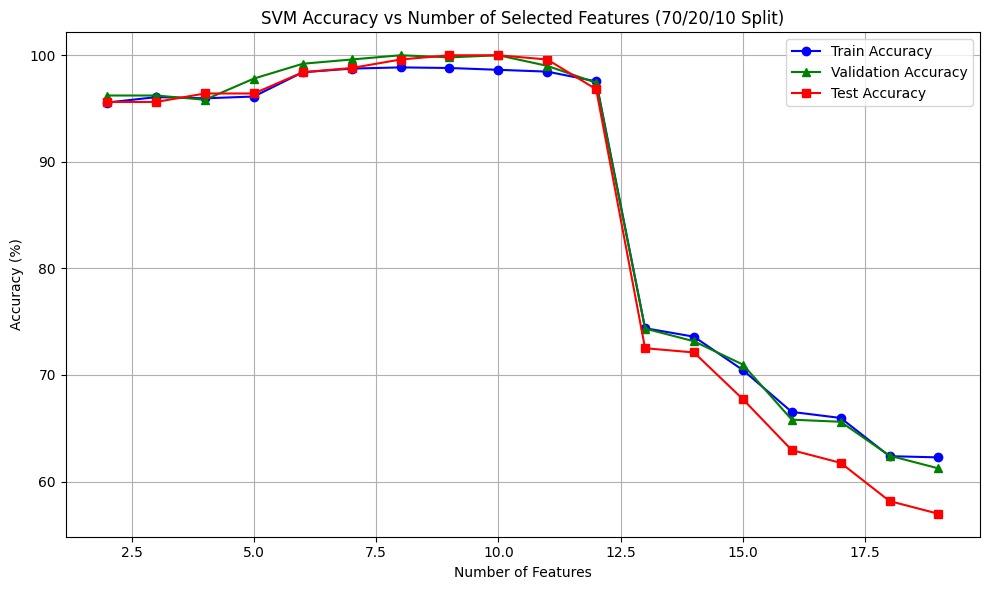

In [3]:
num_features_list = range(2, 20, 1)  # Test different numbers of features
train_accuracies = []
val_accuracies = []
test_accuracies = []

for num_features in num_features_list:
    selected_features = feature_selection(X, y, num_features)
    X_selected = X[:, selected_features]

    X_train, X_test_val, y_train, y_test_val = train_test_split(
        X_selected, y, test_size=0.3, random_state=42
    )

    X_test, X_val, y_test, y_val = train_test_split(
        X_test_val, y_test_val, test_size=2/3, random_state=42
    )

    # Train SVM
    svm = SVM(C=10.0, lr=0.01, max_iter=1000)
    svm.fit(X_train, y_train)

    # Predictions
    y_train_pred = svm.predict(X_train)
    y_val_pred = svm.predict(X_val)
    y_test_pred = svm.predict(X_test)

    # Accuracies
    train_accuracies.append(np.mean(y_train_pred == y_train) * 100)
    val_accuracies.append(np.mean(y_val_pred == y_val) * 100)
    test_accuracies.append(np.mean(y_test_pred == y_test) * 100)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(num_features_list, train_accuracies, label="Train Accuracy", marker='o', color='b')
plt.plot(num_features_list, val_accuracies, label="Validation Accuracy", marker='^', color='g')
plt.plot(num_features_list, test_accuracies, label="Test Accuracy", marker='s', color='r')

plt.xlabel("Number of Features")
plt.ylabel("Accuracy (%)")
plt.title("SVM Accuracy vs Number of Selected Features (70/20/10 Split)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# From the Graphs above we can see that best Accuracy comes where number of features = 10 :

num_features = 10
selected_features = feature_selection(X, y, num_features)
X_selected = X[:, selected_features]  # Keep only selected features

# Train/Test Split

# X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
X_train, X_test_val, y_train, y_test_val = train_test_split(
    X_selected, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_test_val, y_test_val, test_size=1/3, random_state=42
)

# Train SVM
svm = SVM(C=10.0, lr=0.01, max_iter=1000)
svm.fit(X_train, y_train)

# Predictions
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
y_val_pred = svm.predict(X_val)

# Accuracy Calculation
train_accuracy = np.mean(y_train_pred == y_train) * 100
test_accuracy = np.mean(y_test_pred == y_test) * 100
val_accuracy = np.mean(y_val_pred == y_val) * 100

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {val_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Train Accuracy: 98.63%
Validation Accuracy: 100.00%
Test Accuracy: 100.00%


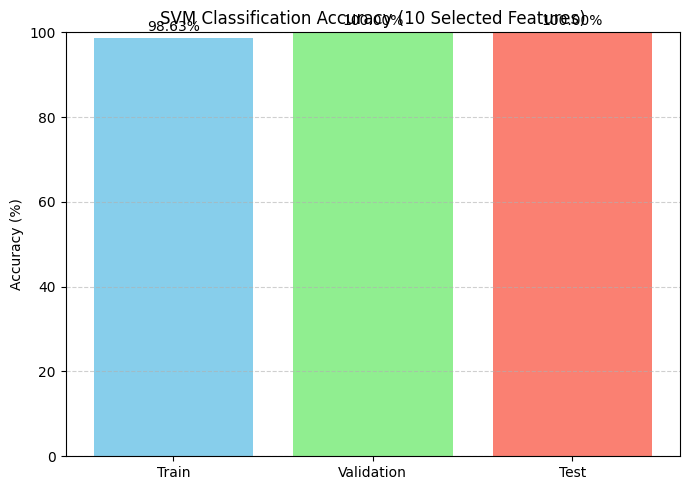

In [5]:
# Accuracy Bar Chart
accuracies = [train_accuracy, val_accuracy, test_accuracy]
labels = ['Train', 'Validation', 'Test']
colors = ['skyblue', 'lightgreen', 'salmon']

plt.figure(figsize=(7, 5))
plt.bar(labels, accuracies, color=colors)
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('SVM Classification Accuracy (10 Selected Features)')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()